<h3>Binomial</h3>
<p>Vimos el d&iacute;a pasado que la probabilidad de obtener exactamente $k$ caras al lanzar una moneda, con probabilidad $p$ de cara en cada lanzamiento, es</p>
<p>$$B(n,k):=\binom{n}{k}p^k(1-p)^{n-k}.$$</p>

In [1]:
L = [(binomial(1000,n)*(1/2)^n*(1/2)^(1000-n)).n() for n in srange(0,1001)]

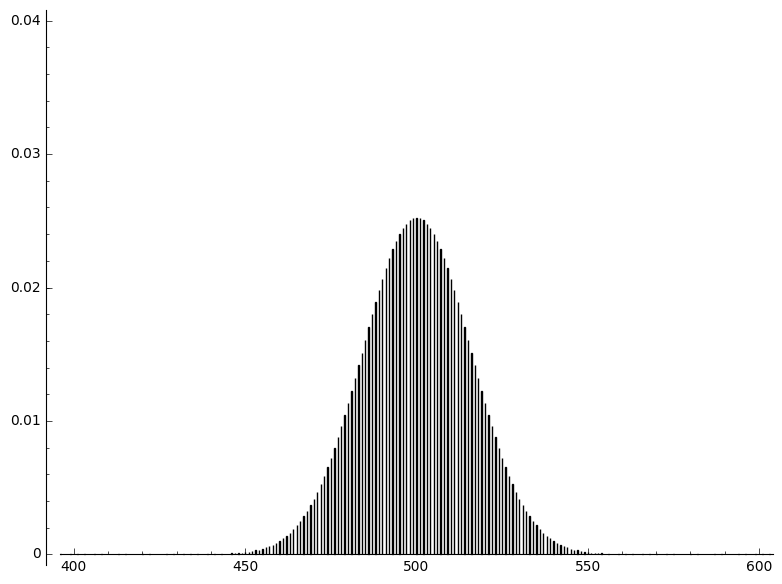

In [2]:
bar_chart(L,width=0.1).show(xmin=400,xmax=600,ymin=0,ymax=0.04)

In [3]:
media = (sum([k*L[k] for k in srange(len(L))])).n();media

500.000000000000

In [4]:
DS = sqrt(sum([((k-media)^2)*L[k] for k in srange(len(L))])).n();print DS;print DS^2

15.8113883008419
250.000000000000


<h3>Ruina del jugador</h3>

In [5]:
def moneda():
    x = random()
    if x <= 0.5:
        return -1
    else:
        return 1

In [7]:
def ruina(N):
    L = [N]
    while N > 0:
        N += moneda()
        L.append(N)
    return L

In [8]:
L=ruina(100); len(L)

179865

In [9]:
LL=zip(srange(len(ruina(100))),ruina(100))

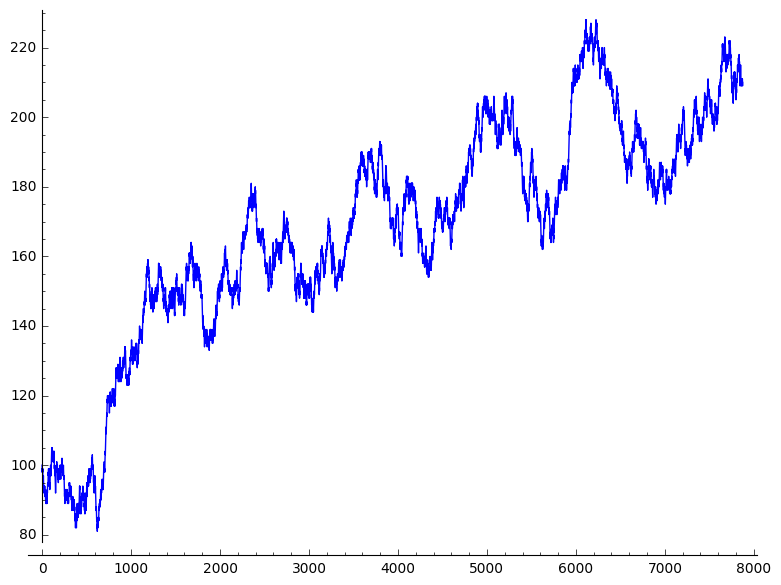

In [10]:
line(LL).show()

<p>Tiempo que tardamos en arruinarnos:</p>

In [11]:
def ruina_len(N):
    cont = 1
    while N > 0:
        N += moneda()
        cont += 1
    return cont

In [12]:
RUINA = [ruina_len(20) for int in srange(100)]

In [13]:
(sum(RUINA)/100).n()

8060.26000000000

In [14]:
RUINA2 = [(sum([ruina_len(20) for int in srange(20)])/20).n() for int2 in srange(5)];RUINA2

[56487.0000000000,
 1768.20000000000,
 35144.4000000000,
 91305.8000000000,
 20555.9000000000]

<p>En promedio, &iquest;cu&aacute;nto tarda en arruinarse el jugador?</p>
<h3>Jugador precavido</h3>
<p>AHORA fijamos un tope superior, es decir el jugador abandona cuando llega a un cierto valor de su 'riqueza':</p>

In [15]:
def ruina_s(N,M):
    #L = [N]
    while M > N > 0:
        N += moneda()
    #   L.append(N)
    return N,M

In [16]:
ruina_s(100,1100)

(1100, 1100)

In [17]:
def prob_no_ruina(N,M,R):
    cont = 0
    for int in srange(R):
            ruina,exito=ruina_s(N,M)
            if ruina != 0:
                cont += 1
    return (cont/R).n()

In [18]:
prob_no_ruina(100,110,10000)

0.908900000000000

In [19]:
LL=[(100+k*10,prob_no_ruina(100,100+k*10,1000)) for k in srange(10)]

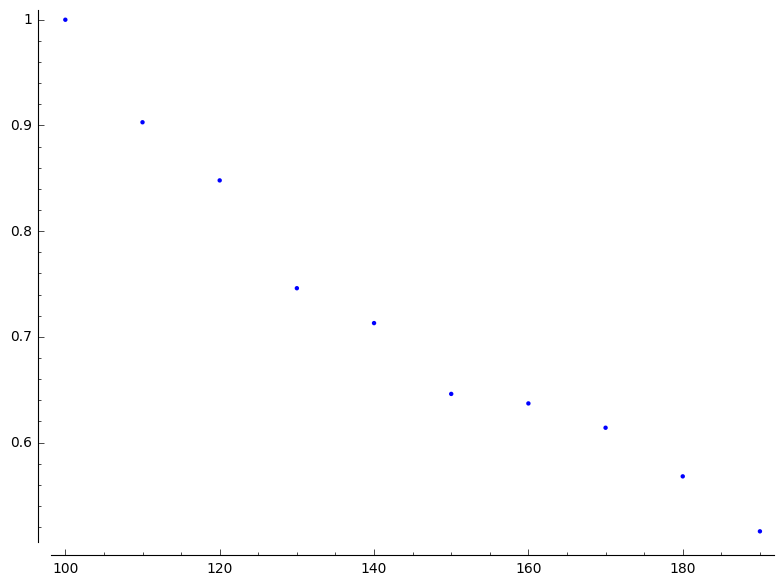

In [20]:
points(LL).show()

In [21]:
var('AA BB')
modelo(X)=AA+BB/X

In [22]:
find_fit(LL,modelo,solution_dict=True)

{AA: 0.013539416923958734, BB: 98.16202758749334}

In [23]:
[(100/(100+k*10)).n() for k in srange(20)]

[1.00000000000000,
 0.909090909090909,
 0.833333333333333,
 0.769230769230769,
 0.714285714285714,
 0.666666666666667,
 0.625000000000000,
 0.588235294117647,
 0.555555555555556,
 0.526315789473684,
 0.500000000000000,
 0.476190476190476,
 0.454545454545455,
 0.434782608695652,
 0.416666666666667,
 0.400000000000000,
 0.384615384615385,
 0.370370370370370,
 0.357142857142857,
 0.344827586206897]

<h3>Casino limitado</h3>

In [27]:
def casino_limitado(RC,RJ):
    while (RC>0 and RJ>0):
        x = moneda()
        if x == 1:
            RJ += 1
            RC -= 1
        else:
            RJ -= 1
            RC += 1
    return RC,RJ

In [28]:
casino_limitado(200,100)

(300, 0)

In [29]:
def prob_ruina_jugador(RCI,RJI,R):
    cont = 0
    for muda in xrange(R):
        rcasino,rjugador = casino_limitado(RCI,RJI)
        if rjugador == 0:
            cont += 1
    return (cont/R).n()

In [30]:
prob_ruina_jugador(100,100,1000)

0.514000000000000

In [31]:
prob_ruina_jugador(200,100,1000)

0.689000000000000

<p>&iquest;C&oacute;mo depende la probabilidad de ruina de las 'fortunas' iniciales?</p>

In [32]:
L3 = [(k*100,prob_ruina_jugador(k*100,100,1000)) for k in srange(1,10)]

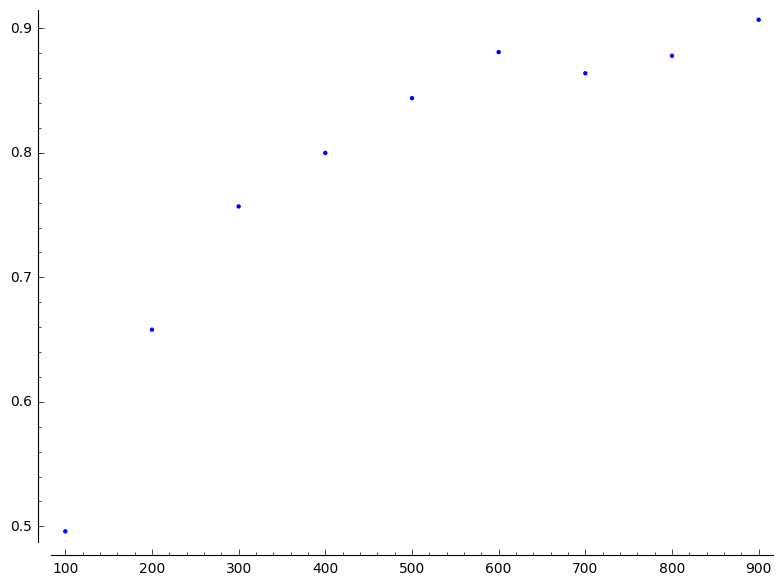

In [33]:
points(L3).show()

<p>Cuando la riqueza del casino es mucho mayor que la del jugador, la probabilidad de ruina del jugador debe ser casi $1$. Ajustemos un modelo a los puntos hallados:</p>

In [38]:
var('B');modelo(X)=X/(X+B)

In [39]:
find_fit(L3,modelo,solution_dict=True)

{B: 99.52163102047531}

<p>Si llamamos $a$ a los fondos del casino al empezar el juego y $b$ a los del jugador debemos esperar una probabilidad de ruina del jugador igual a $a/(a+b)$, de forma que cuando la riqueza del casino es mucho mayor que la del jugador la ruina de &eacute;ste es casi segura.</p>